In [49]:
#import dependecies
#data cleaning and manipulation
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#machine learning
from sklearn.preprocessing import StandardScaler

import sklearn.linear_model as skl_lm
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split

#import statsmodels.api as sm
#import statsmodels.formula.api as smf



In [22]:
#read the data and check the first five rows
df = pd.read_csv(r"prostate.csv", index_col=0)
df.head()

,lweight,age,lbph,lcp,gleason,pgg45,lpsa,Target
lcavol,,,,,,,,
-0.579818,2.769459,50,-1.386294,-1.386294,6,0,-0.430783,0
-0.994252,3.319626,58,-1.386294,-1.386294,6,0,-0.162519,0
-0.510826,2.691243,74,-1.386294,-1.386294,7,20,-0.162519,0
-1.203973,3.282789,58,-1.386294,-1.386294,6,0,-0.162519,0
0.751416,3.432373,62,-1.386294,-1.386294,6,0,0.371564,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 97 entries, -0.579818495 to 3.471966453
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   lweight  97 non-null     float64
 1   age      97 non-null     int64  
 2   lbph     97 non-null     float64
 3   lcp      97 non-null     float64
 4   gleason  97 non-null     int64  
 5   pgg45    97 non-null     int64  
 6   lpsa     97 non-null     float64
 7   Target   97 non-null     int64  
dtypes: float64(4), int64(4)
memory usage: 6.8 KB


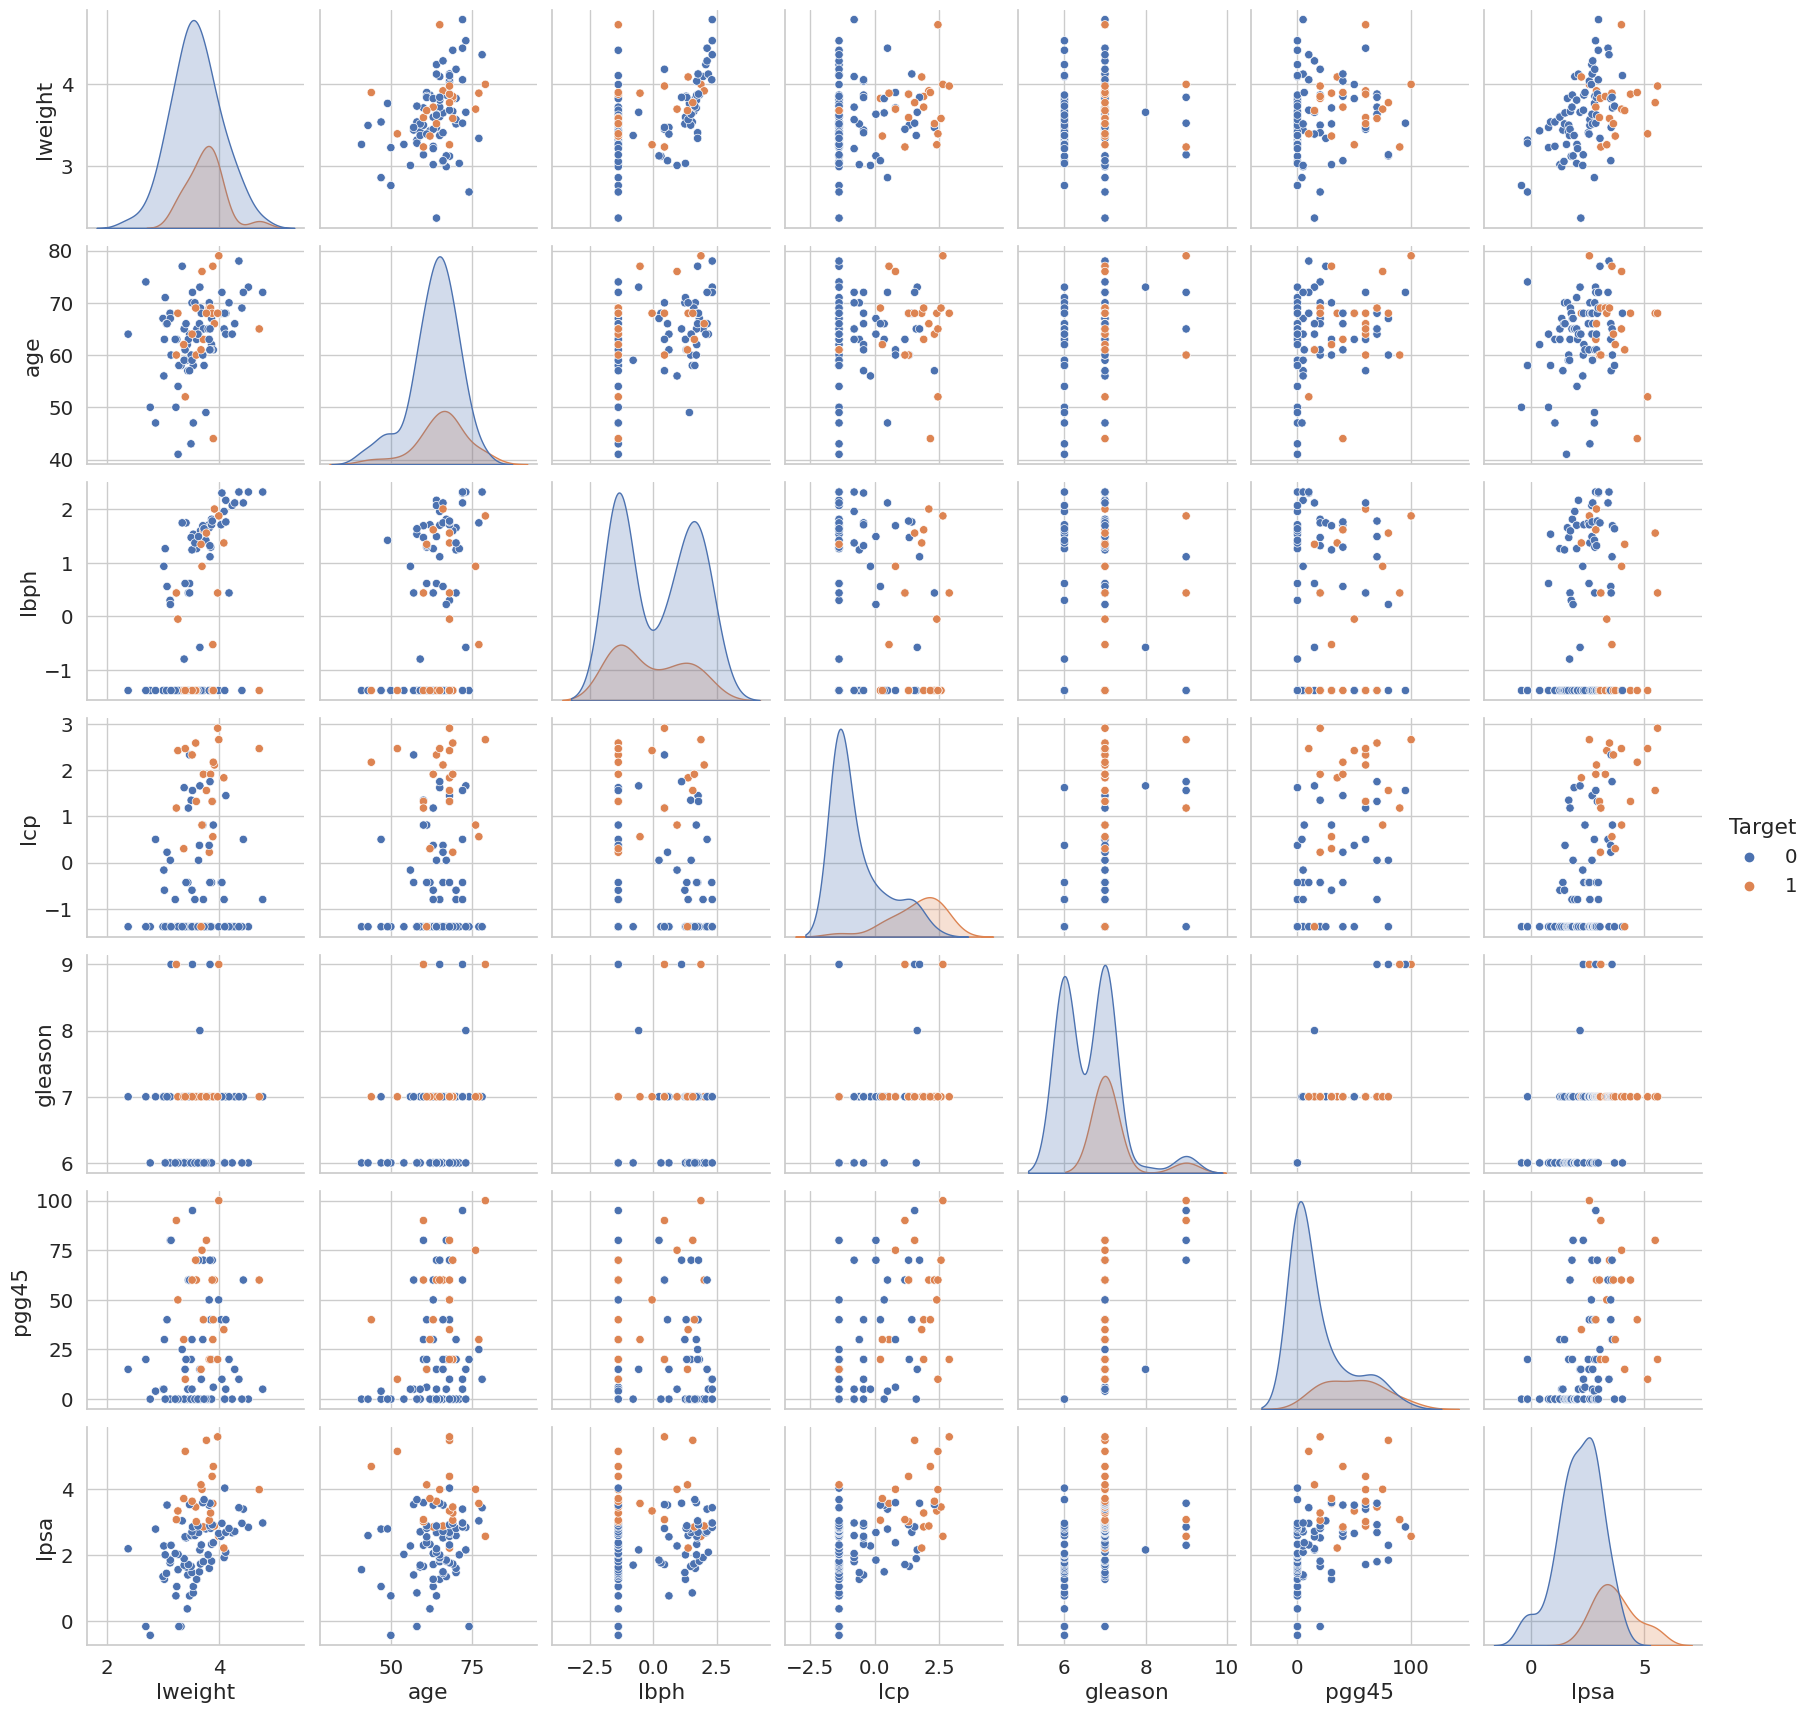

In [26]:
#visualize the distribution of classes
sns.pairplot(df,hue='Target', vars=['lweight',	'age',	'lbph',	'lcp',	'gleason',	'pgg45',	'lpsa'])

<Axes: >

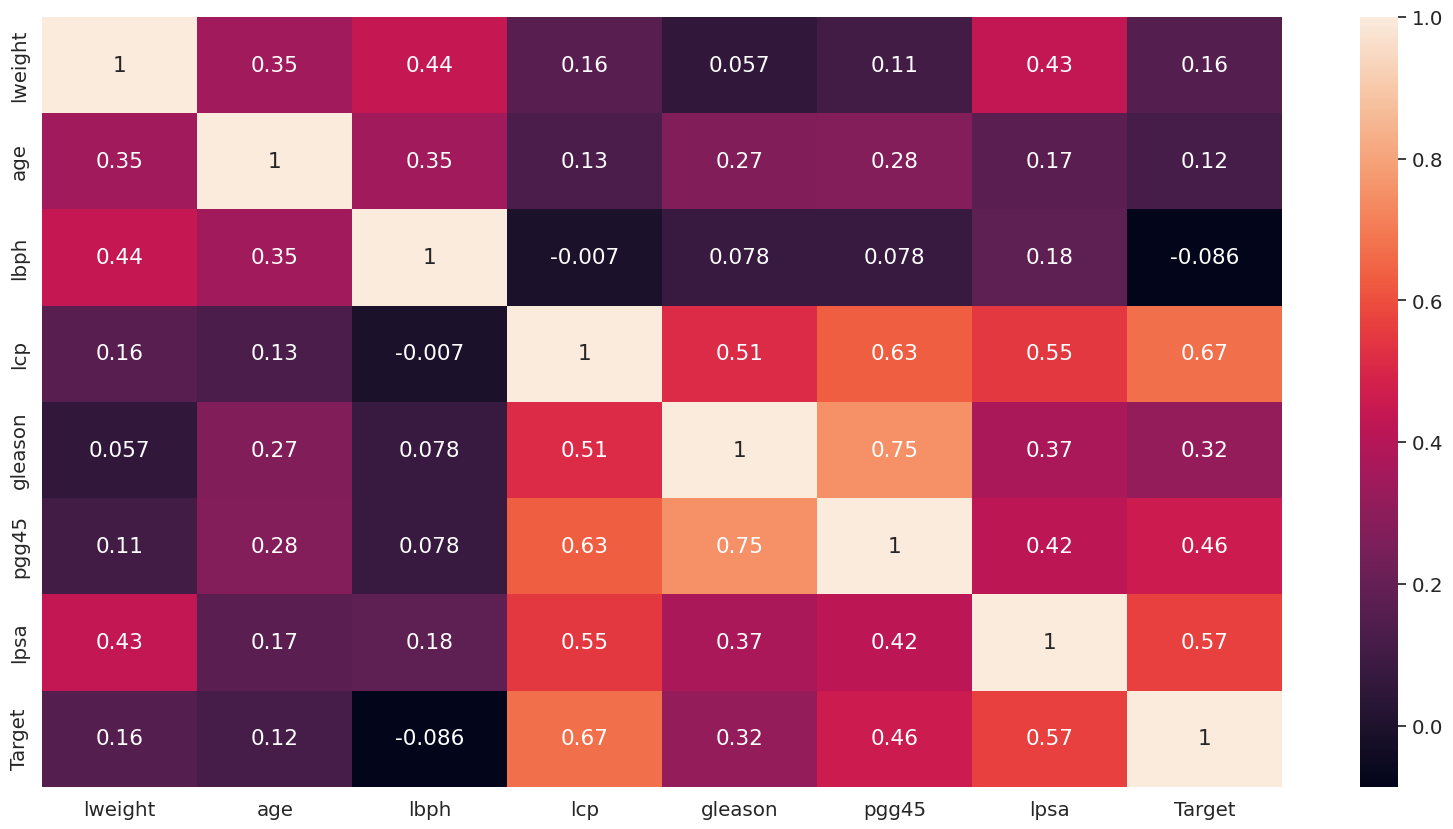

In [27]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [28]:
#Splitting the dataset
X=df.drop(['Target'],axis=1)
y=df['Target']

In [29]:
#from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=40)

In [30]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [54]:
models=[]
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))
models.append(('Logistic R',LogisticRegression()))

In [55]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [59]:
#Evaluate Each Model
results=[]
names=[]
for name, model in models:
  kfold=KFold(n_splits=10)
  cv_results=cross_val_score(model, X_train,y_train,cv=kfold,scoring="accuracy")
  results.append(cv_results)
  names.append(name)

  msg='%s:, %f, (%f)' %(name,cv_results.mean(), cv_results.std())
  print(msg)

KNN:, 0.913889, (0.079495)
NB:, 0.890278, (0.100433)
SVM:, 0.900000, (0.075000)
Logistic R:, 0.912500, (0.080039)
